#CVPR Lab 7

###SURF, HOG and ORB

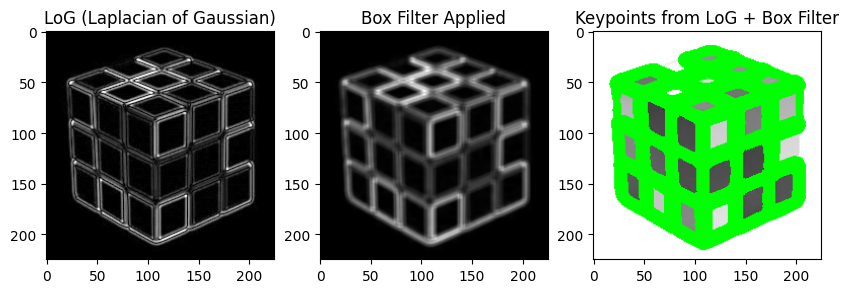

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("Rubic2.jpeg", cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur (Pre-smoothing)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Apply Laplacian (LoG for edge detection)
laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F, ksize=3)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Step 3: Apply Box Filter (Approximating Hessian Matrix Response)
box_filtered = cv2.boxFilter(laplacian_abs, -1, (5, 5))

# Step 4: Detect Keypoints using LoG Response (Thresholding)
threshold = 30  # Adjust as needed
keypoints = np.argwhere(box_filtered > threshold)

# Visualizing keypoints on the image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for kp in keypoints:
    y, x = kp
    cv2.circle(output_image, (x, y), 3, (0, 255, 0), -1)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("LoG (Laplacian of Gaussian)")
plt.imshow(laplacian_abs, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Box Filter Applied")
plt.imshow(box_filtered, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Keypoints from LoG + Box Filter")
plt.imshow(output_image)

plt.show()

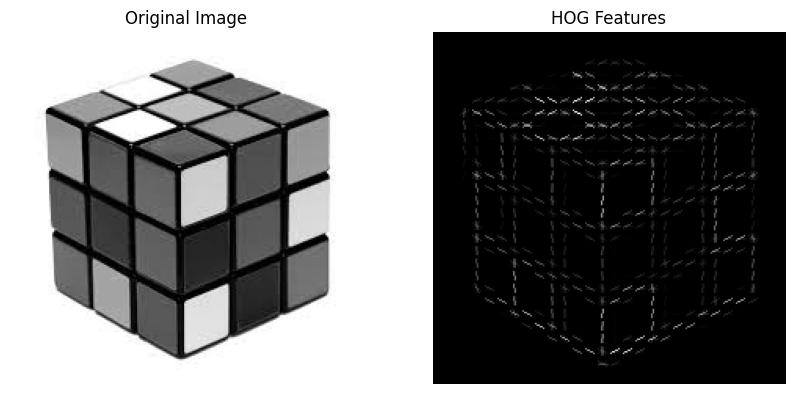

In [ ]:
from skimage.feature import hog
from skimage import color
import cv2
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread("Rubic2.jpeg")
gray = color.rgb2gray(image)

# Compute HOG features
hog_features, hog_image = hog(gray, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2),
                              visualize=True,
                              block_norm='L2-Hys')

# Show HOG features
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap="gray")
plt.title("HOG Features")
plt.axis("off")

plt.show()


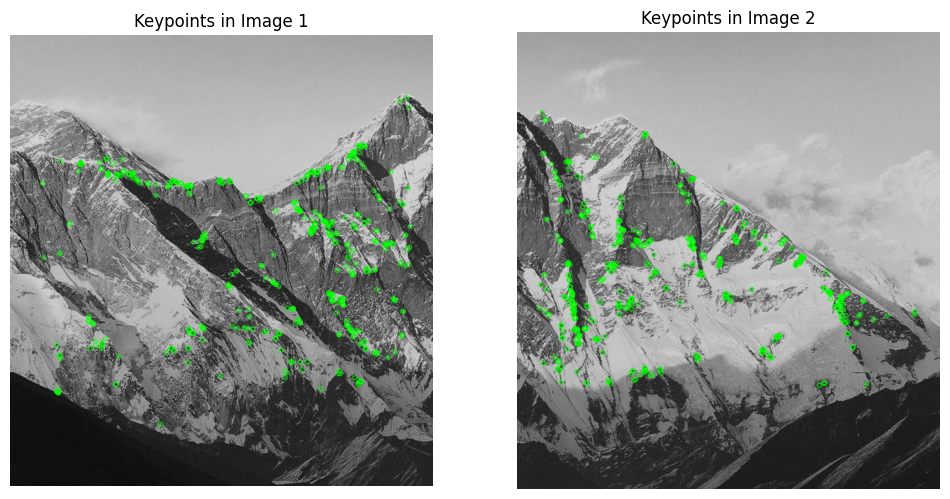

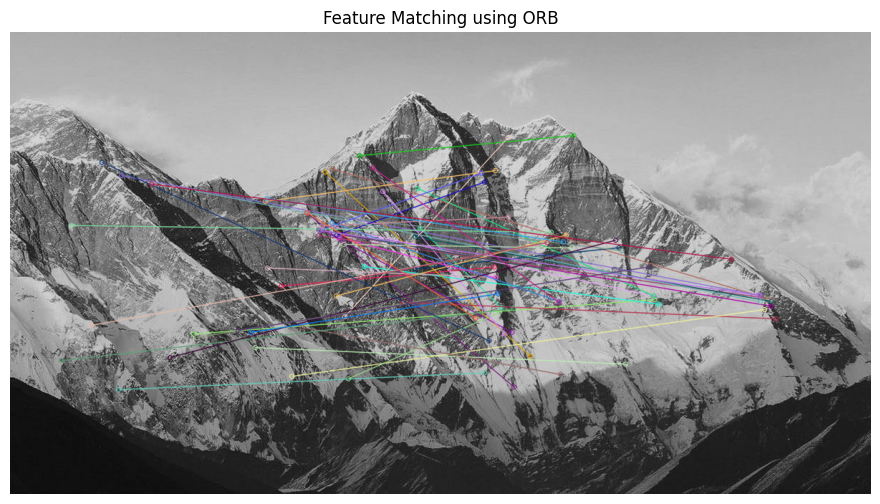

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images (grayscale)
img1 = cv2.imread("Mountain1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Mountain2.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create(nfeatures=500)  # Adjust number of keypoints

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Draw keypoints
img1_kp = cv2.drawKeypoints(img1, keypoints1, None, color=(0, 255, 0), flags=0)
img2_kp = cv2.drawKeypoints(img2, keypoints2, None, color=(0, 255, 0), flags=0)

# Show images with keypoints
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1_kp, cmap="gray")
plt.title("Keypoints in Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_kp, cmap="gray")
plt.title("Keypoints in Image 2")
plt.axis("off")

plt.show()

# Feature matching using Hamming distance (suitable for ORB's binary descriptors)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (lower is better)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the best 50 matches
match_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show matched features
plt.figure(figsize=(12, 6))
plt.imshow(match_img)
plt.title("Feature Matching using ORB")
plt.axis("off")
plt.show()
